In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn import metrics
import seaborn as sns
import sys
if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

In [3]:
dataset = pd.read_csv('spam_ham_dataset.csv')

In [4]:
dataset.isnull().sum()

Unnamed: 0    0
label         0
text          0
label_num     0
dtype: int64

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  5171 non-null   int64 
 1   label       5171 non-null   object
 2   text        5171 non-null   object
 3   label_num   5171 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 161.7+ KB


In [6]:
dataset.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [10]:
spam = 0
ham = 0
for i in dataset['label_num']:
    if i == 1:
        spam += 1
    if i == 0:
        ham += 1
        
print('spam: ', spam, '\nham:', ham)

spam:  1499 
ham: 3672


# Cleaning regular expression and stop words.

In [8]:
import re    #regular expression, will be used to extract punctuation marks.

import nltk
stopWords = nltk.download('stopwords')

nltk.download('stopwords')
from nltk.corpus import stopwords

from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()


[nltk_data] Downloading package stopwords to /home/revo/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to /home/revo/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [9]:
corpus = []
for i in range(len(dataset)):
    text = re.sub('[^a-zA-Z]',' ', dataset['text'][i])
    text = text.lower()
    text = text.split()
    text = [ps.stem(word) for word in text if not word in set(stopwords.words('english'))]
    text = ' '.join(text)
    corpus.append(text)

# Sample mail
 


In [10]:
corpus[2]

'subject neon retreat ho ho ho around wonder time year neon leader retreat time know time year extrem hectic tough think anyth past holiday life go past week decemb januari like think minut calend hand begin fall semest retreat schedul weekend januari youth minist confer brad dustin connect week go chang date follow weekend januari come part need think think agre import us get togeth time recharg batteri get far spring semest lot troubl difficult us get away without kid etc brad came potenti altern get togeth weekend let know prefer first option would retreat similar done past sever year year could go heartland countri inn www com outsid brenham nice place bedroom bedroom hous side side countri real relax also close brenham one hour minut golf shop antiqu craft store brenham eat dinner togeth ranch spend time meet saturday return sunday morn like done past second option would stay houston dinner togeth nice restaur dessert time visit recharg one home saturday even might easier trade wo

# Creation of countvectorizer.

In [11]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

# Dividing the data set into train and test.

In [12]:
X = cv.fit_transform(corpus).toarray()      
y = dataset.iloc[:,-1:].values

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(X, y,test_size=0.2, random_state=0)

# Creating the model.

In [14]:
from xgboost import XGBClassifier
model = XGBClassifier(n_estimators = 150, booster = 'gbtree')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print('XGBoost Accuracy: ', metrics.accuracy_score(y_test, y_pred), '\n')
print("XGBClassifier Confusion Matrix\n", cm)

XGBoost Accuracy:  0.9739130434782609 

XGBClassifier Confusion Matrix
 [[713  19]
 [  8 295]]


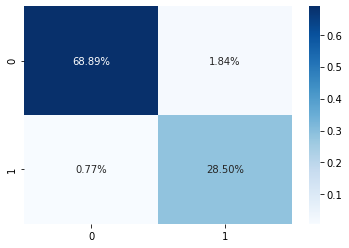

In [15]:
sns.heatmap(cm/np.sum(cm), annot=True, fmt='.2%', cmap='Blues')

In [16]:
cross_val = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 10)
print('XGB Accuracy: ', cross_val.mean())
print('XGB Std: ', cross_val.std())

XGB Accuracy:  0.9705062521201062
XGB Std:  0.006080123602996539


# Model optimization

In [ ]:
from sklearn.model_selection import GridSearchCV

params = [
    {'n_estimators' : [50,100,150,200, 250], 'booster' : ['gbtree', 'gblinear']}
    ]


gs = GridSearchCV(
    estimator = model,
    param_grid = params,
    scoring = 'accuracy',
    cv = 10,
    n_jobs = -1
    )


grid_search = gs.fit(X_train, y_train)
best_result = grid_search.best_score_
best_params = grid_search.best_params_

print('Best_Result', best_result)
print('Best_Params', best_params)

# Registration of the model.
  

In [ ]:
import pickle
save = pickle.dump(model, open('model.save', 'wb'))